In [33]:
import main 
import pandas as pd
from matplotlib import pyplot as plt
import pymorphy2
from tqdm import trange

1. С использованием средств библиотеки Pandas прочитать все данные (в DataFrame будет несколько столбцов, в зависимости от варианта, например, у варианта 10 - Количество звезд, Текст рецензии).
2. Произвести именование колонок сформированного DataFrame в соответствии с рекомендациями, полученными на соответствующей лекции.

In [47]:
columns = ['mark', 'text_of_comment', 'num_of_words']
    
dataset_path = main.GetDatasetPath()
dataframe = main.GetDataframe(dataset_path)
print(dataframe)

1 : 0001
1 : 0002
1 : 0003
1 : 0004
1 : 0005
1 : 0006
1 : 0007
1 : 0008
1 : 0009
1 : 0010
1 : 0011
1 : 0012
1 : 0013
1 : 0014
1 : 0015
1 : 0016
1 : 0017
1 : 0018
1 : 0019
1 : 0020
1 : 0021
1 : 0022
1 : 0023
1 : 0024
1 : 0025
1 : 0026
1 : 0027
1 : 0028
1 : 0029
1 : 0030
1 : 0031
1 : 0032
1 : 0033
1 : 0034
1 : 0035
1 : 0036
1 : 0037
1 : 0038
1 : 0039
1 : 0040
1 : 0041
1 : 0042
1 : 0043
1 : 0044
1 : 0045
1 : 0046
1 : 0047
1 : 0048
1 : 0049
1 : 0050
1 : 0051
1 : 0052
1 : 0053
1 : 0054
1 : 0055
1 : 0056
1 : 0057
1 : 0058
1 : 0059
1 : 0060
1 : 0061
1 : 0062
1 : 0063
1 : 0064
1 : 0065
1 : 0066
1 : 0067
1 : 0068
1 : 0069
1 : 0070
1 : 0071
1 : 0072
1 : 0073
1 : 0074
1 : 0075
1 : 0076
1 : 0077
1 : 0078
1 : 0079
1 : 0080
1 : 0081
1 : 0082
1 : 0083
1 : 0084
1 : 0085
1 : 0086
1 : 0087
1 : 0088
1 : 0089
1 : 0090
1 : 0091
1 : 0092
1 : 0093
1 : 0094
1 : 0095
1 : 0096
1 : 0097
1 : 0098
1 : 0099
1 : 0100
1 : 0101
1 : 0102
1 : 0103
1 : 0104
1 : 0105
1 : 0106
1 : 0107
1 : 0108
1 : 0109
1 : 0110
1 : 0111
1

3. Произвести проверку на наличие невалидных значений в колонках (NaN, None и т.п.). В случае нахождения выполнить обработку таких значений.

In [48]:
if(main.CheckNan(dataframe, columns[1])):
        print('В датасете обнаружены и удалены значения Nan')
        dataframe.dropna() 

4. Добавить в DataFrame столбец, который будет содержать информацию о кол-ве слов в ячейке, содержащей текстовую информацию

In [49]:
count_word = main.CountWords(dataframe, columns[1])
dataframe[columns[2]] = pd.Series(count_word)
print(dataframe)

     mark                                    text_of_comment  num_of_words
0       1  Название:Задача трёх тел\nРецензия:\nО чем это...           106
1       1  Название:Бунт на «Баунти»\nРецензия:\nО чём сю...           115
2       1  Название:Петербург\nРецензия:\nЗнаю, что в кни...           102
3       1  Название:Петербург\nРецензия:\nЗнаю, что в кни...           102
4       1  Название:Исчезновение Мэдлин\nРецензия:\nСтоль...            11
...   ...                                                ...           ...
4990    5  Название:Проклятие на удачу\nРецензия:\nХороша...            35
4991    5  Название:Сицилийский клан\nРецензия:\nКак же з...            38
4992    5  Название:Сказать жизни "Да!". Психолог в концл...           124
4993    5  Название:Книга Балтиморов\nРецензия:\nКакой за...           136
4994    5  Название:Три билета в кино\nРецензия:\nВсе нач...           125

[4995 rows x 3 columns]


5. С использованием Pandas вычислить статистическую информацию для столбцов, содержащих числовую информацию.

In [50]:
stat = dataframe[columns[2]].describe()
print(stat)

count    4995.000000
mean      105.158158
std        33.737986
min         3.000000
25%        96.000000
50%       119.000000
75%       127.000000
max       319.000000
Name: num_of_words, dtype: float64


6. Написать функцию, которая на вход принимает DataFrame и количество слов, а возвращает отфильтрованный по количеству слов DataFrame. Условие фильтрации - в новый DataFrame включаются те строки, для которых значение в столбце с количеством слов ≤ заданного значения

In [51]:
df_words_filtered = pd.DataFrame(dataframe[dataframe[columns[2]] >= 10])

print(df_words_filtered)

     mark                                    text_of_comment  num_of_words
0       1  Название:Задача трёх тел\nРецензия:\nО чем это...           106
1       1  Название:Бунт на «Баунти»\nРецензия:\nО чём сю...           115
2       1  Название:Петербург\nРецензия:\nЗнаю, что в кни...           102
3       1  Название:Петербург\nРецензия:\nЗнаю, что в кни...           102
4       1  Название:Исчезновение Мэдлин\nРецензия:\nСтоль...            11
...   ...                                                ...           ...
4990    5  Название:Проклятие на удачу\nРецензия:\nХороша...            35
4991    5  Название:Сицилийский клан\nРецензия:\nКак же з...            38
4992    5  Название:Сказать жизни "Да!". Психолог в концл...           124
4993    5  Название:Книга Балтиморов\nРецензия:\nКакой за...           136
4994    5  Название:Три билета в кино\nРецензия:\nВсе нач...           125

[4976 rows x 3 columns]


7. Написать функцию, которая на вход принимает DataFrame и метку класса (например, Количество звезд), а возвращает отфильтрованный по заданной метке DataFrame.

In [52]:
reviews_mark_1 = pd.DataFrame(dataframe[dataframe[columns[0]] == '1'])

    
print(reviews_mark_1)

    mark                                    text_of_comment  num_of_words
0      1  Название:Задача трёх тел\nРецензия:\nО чем это...           106
1      1  Название:Бунт на «Баунти»\nРецензия:\nО чём сю...           115
2      1  Название:Петербург\nРецензия:\nЗнаю, что в кни...           102
3      1  Название:Петербург\nРецензия:\nЗнаю, что в кни...           102
4      1  Название:Исчезновение Мэдлин\nРецензия:\nСтоль...            11
..   ...                                                ...           ...
994    1  Название:Место вдали от волков\nРецензия:\nЯ о...           134
995    1  Название:Айвенго\nРецензия:\nПовествование и м...           123
996    1  Название:Посторонний\nРецензия:\nНастолько пус...            65
997    1  Название:Русские супергерои\nРецензия:\nС таки...           115
998    1  Название:Книжный вор\nРецензия:\nПрочитав назв...           124

[999 rows x 3 columns]


8. Выполнить группировку DataFrame по метке класса с вычислением максимального, минимального и среднего значения по количеству слов

In [53]:
data = list()
for i in range(1,6):
    rewiews_words = pd.DataFrame(df_words_filtered[df_words_filtered[columns[0]] == str(i)])
    stat = main.StatInfo(rewiews_words, columns[2])
    print(f'\nДля оценки {i}:\n')
    print('Минимальное кол-во слов:', stat['min'])
    print('Максимальное кол-во слов:', stat['max'])
    print('Среднее кол-во слов:', stat['mean'])


Для оценки 1:

Минимальное кол-во слов: 10.0
Максимальное кол-во слов: 157.0
Среднее кол-во слов: 96.81653225806451

Для оценки 2:

Минимальное кол-во слов: 10.0
Максимальное кол-во слов: 158.0
Среднее кол-во слов: 103.41289023162135

Для оценки 3:

Минимальное кол-во слов: 10.0
Максимальное кол-во слов: 319.0
Среднее кол-во слов: 108.58817635270542

Для оценки 4:

Минимальное кол-во слов: 11.0
Максимальное кол-во слов: 148.0
Среднее кол-во слов: 112.1537688442211

Для оценки 5:

Минимальное кол-во слов: 10.0
Максимальное кол-во слов: 154.0
Среднее кол-во слов: 106.66032064128257


In [54]:
stat_1 = main.StatInfo(reviews_mark_1, columns[2])
print('\nДля оценки 1:\n')
print('Минимальное кол-во слов:', stat_1['min'])
print('Максимальное кол-во слов:', stat_1['max'])
print('Среднее кол-во слов:', stat_1['mean'])


Для оценки 1:

Минимальное кол-во слов: 3.0
Максимальное кол-во слов: 157.0
Среднее кол-во слов: 96.17717717717717


9. Написать функцию, которая на вход принимает DataFrame и метку класса, а возвращает гистограмму для слов. Для расчета гистограммы необходимо будет разбить блоки текста на слова и выполнить процедуру лемматизации для каждого слова 

In [76]:
def create_hist(df: pd.DataFrame, number_star: int) -> list:
    """Lemitization and counter words"""
    words = []  # для леминитизированных слов
    lonely_words_count = []  # для подсчета вхождений каждого слова
    morph = pymorphy2.MorphAnalyzer()
    print("Обрабатываем кол-во слов")
    df["mark"]=df["mark"].astype(int)
    for i in trange(len(df[df.mark == number_star])):
        words_list = (df.text_of_comment[i]).split()  # разбиваем текст на слова
        for word in words_list:
            p = morph.parse(word)[0]
            words.append(p.normal_form)
    

    lonely_words = list(set(words))  # слова без повторений
    for element in lonely_words:
        lonely_words_count.append(words.count(element))
    book = dict(zip(lonely_words_count, lonely_words))
    return sorted(book.items())  # вернем остортированный  словарь
    

In [77]:
hist_info = create_hist(dataframe, 4)

Обрабатываем кол-во слов


100%|██████████| 999/999 [00:40<00:00, 24.67it/s]


In [78]:
hist_info

[(1, 'заклятие'),
 (2, 'типа:'),
 (3, 'навык'),
 (4, 'злодей'),
 (5, 'вновь'),
 (6, 'затем'),
 (7, 'субъективный'),
 (8, 'развиваться'),
 (9, 'лет.'),
 (10, 'логика'),
 (11, 'персонажей.'),
 (12, 'немой'),
 (13, 'предложение'),
 (14, 'неожиданный'),
 (15, 'страдать'),
 (16, 'отличный'),
 (17, 'долгий'),
 (18, 'это,'),
 (19, 'правило'),
 (20, 'миллион'),
 (21, 'целое'),
 (22, 'война'),
 (23, 'мнение'),
 (24, 'дух'),
 (25, 'где-то'),
 (26, 'особенно'),
 (27, 'так,'),
 (28, 'давно'),
 (29, 'богатый'),
 (30, 'хорошо'),
 (31, 'итог'),
 (32, 'парень'),
 (33, 'выйти'),
 (34, 'будто'),
 (35, 'потратить'),
 (36, 'попытка'),
 (37, 'тема'),
 (38, 'маленький'),
 (39, 'плохой'),
 (40, 'день'),
 (41, 'некоторый'),
 (42, 'думать'),
 (43, 'найти'),
 (44, 'полный'),
 (45, 'имя'),
 (46, 'всегда'),
 (47, 'читатель'),
 (48, 'из-за'),
 (49, 'стоить'),
 (50, 'нет.'),
 (52, 'больший'),
 (53, 'получить'),
 (54, 'делать'),
 (55, 'текст'),
 (56, 'данный'),
 (57, 'совершенно'),
 (58, 'поэтому'),
 (59, 'начать'),

10. Выполнить визуализацию гистограммы, полученной из пункта 9, с помощью средств библиотеки matplotlib. Соответствующие оси, графики и значения необходимо подписать.

In [87]:
def print_histogram(hist_info: dict) -> None:
    plt.title("Популярность слов:")
    plt.xlabel("Слова")
    plt.ylabel("количество использований")
    plt.bar(hist_info.values(), hist_info.keys(), color="r")
    plt.show()

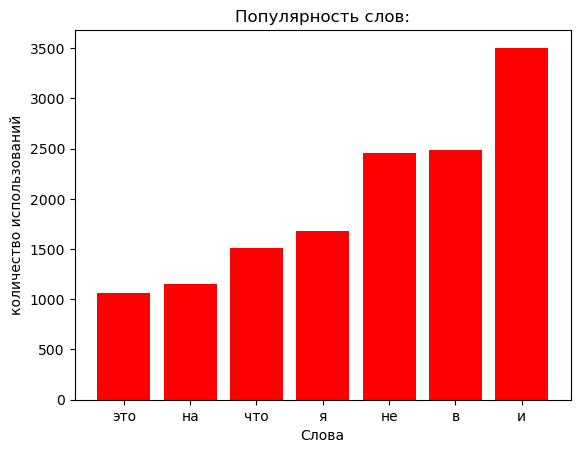

In [95]:
print_histogram(dict(hist_info[-7:]))  